# 01. Importing Libraries

In [79]:
import sys  
!{sys.executable} -m pip install --user geopandas
!{sys.executable} -m pip install --user geodatasets
!{sys.executable} -m pip install --user geopy

In [81]:
import pandas as pd
import numpy as np
import os
import geopandas as gpd
import geodatasets
from geopy.exc import GeocoderTimedOut 
from geopy.geocoders import Nominatim 

# 02 Import Data

In [103]:
path = r'C:\Users\isava\OneDrive\Documents\CareerFoundry\Data Immersion\AdvancedAnalytics\WorldRiskIndex'

In [105]:
df = pd.read_csv(os.path.join(path,'02 Data','CleanedData', 'world_risk_index_cleaned.csv'))

In [111]:
df.head()

,Region,WRI,Exposure,Vulnerability,Susceptibility,Lack of Coping Capabilities,Lack of Adaptive Capacities,Year,Exposure Category,WRI Category,Vulnerability Category,Susceptibility Category
0,Vanuatu,32.00,56.33,56.81,37.14,79.34,53.96,2011,Very High,Very High,High,High
1,Tonga,29.08,56.04,51.90,28.94,81.80,44.97,2011,Very High,Very High,Medium,Medium
2,Philippines,24.32,45.09,53.93,34.99,82.78,44.01,2011,Very High,Very High,High,High
3,Solomon Islands,23.51,36.40,64.60,44.11,85.95,63.74,2011,Very High,Very High,Very High,High
4,Guatemala,20.88,38.42,54.35,35.36,77.83,49.87,2011,Very High,Very High,High,High


The followign data set was found from the following link: https://github.com/google/dspl/blob/master/samples/google/canonical/countries.csv

In [107]:
coord = pd.read_csv(os.path.join(path,'02 Data','CleanedData', 'countries_coordinates.csv'))

In [109]:
coord.head()

,country,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla


# 03 Data Prep

My aim here is to add latitude regions based on country to the data set. I am hoping to get a general idea of WRI for the different latitude regions. My hypothesis is that equatorial regions score higher for both exposure and vulnerability scores.

In [142]:
coord.rename(columns={"name": "Region"}, inplace = True) #Rename to be able to perform merge.
coord.head()

,country,latitude,longitude,Region
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla


In [158]:
df_lat = pd.merge(df, coord, on='Region', how='left')

In [160]:
df_lat = df_lat.drop(columns=['country', 'longitude'], axis = 1)

In [162]:
df_lat.head()

,Region,WRI,Exposure,Vulnerability,Susceptibility,Lack of Coping Capabilities,Lack of Adaptive Capacities,Year,Exposure Category,WRI Category,Vulnerability Category,Susceptibility Category,latitude
0,Vanuatu,32.00,56.33,56.81,37.14,79.34,53.96,2011,Very High,Very High,High,High,-15.376706
1,Tonga,29.08,56.04,51.90,28.94,81.80,44.97,2011,Very High,Very High,Medium,Medium,-21.178986
2,Philippines,24.32,45.09,53.93,34.99,82.78,44.01,2011,Very High,Very High,High,High,12.879721
3,Solomon Islands,23.51,36.40,64.60,44.11,85.95,63.74,2011,Very High,Very High,Very High,High,-9.645710
4,Guatemala,20.88,38.42,54.35,35.36,77.83,49.87,2011,Very High,Very High,High,High,15.783471


#### Missing Values

I am assuming that there are missing values due to name mismatches. I will go through them now and potentially manually update or rename my regions to match. 

In [166]:
df_lat.isnull().sum()

Region                          0
WRI                             0
Exposure                        0
Vulnerability                   0
Susceptibility                  0
Lack of Coping Capabilities     0
Lack of Adaptive Capacities     0
Year                            0
Exposure Category               0
WRI Category                    0
Vulnerability Category          0
Susceptibility Category         0
latitude                       86
dtype: int64

86 missing values, which will be manually added. 

In [174]:
df_lat[df_lat['latitude'].isnull()]['Region'].unique()

array(['East Timor', 'Cabo Verde', 'Ivory Coast', 'Myanmar', 'Congo',
       'Eswatini', 'North Macedonia', 'Sao Tome and Principe',
       'Democratic Republic of the Congo'], dtype=object)

In [198]:
df_lat.loc[df_lat['Region'] == 'East Timor','latitude'] = -8.7947
df_lat.loc[df_lat['Region'] == 'Cabo Verde','latitude'] = 16.002082
df_lat.loc[df_lat['Region'] == 'Ivory Coast','latitude'] = 7.539989
df_lat.loc[df_lat['Region'] == 'Myanmar','latitude'] = 21.913965
df_lat.loc[df_lat['Region'] == 'Congo','latitude'] = -0.228021
df_lat.loc[df_lat['Region'] == 'Democratic Republic of the Congo','latitude'] = -4.03833
df_lat.loc[df_lat['Region'] == 'Eswatini','latitude'] = -26.522503
df_lat.loc[df_lat['Region'] == 'North Macedonia','latitude'] = 41.608635
df_lat.loc[df_lat['Region'] == 'Sao Tome and Principe','latitude'] = 0.18636

In [200]:
df_lat[df_lat['latitude'].isnull()]['Region'].unique()

array([], dtype=object)

In [202]:
df_lat.isnull().sum()

Region                         0
WRI                            0
Exposure                       0
Vulnerability                  0
Susceptibility                 0
Lack of Coping Capabilities    0
Lack of Adaptive Capacities    0
Year                           0
Exposure Category              0
WRI Category                   0
Vulnerability Category         0
Susceptibility Category        0
latitude                       0
dtype: int64

All latitudes are accounted for. 

#### Latitude Regions

Now I will create latitude regions. The zones will be based on the description in the following textbook: https://geo.libretexts.org/Bookshelves/Geography_(Physical)/The_Physical_Environment_(Ritter)/01%3A_Essentials_of_Geography/1.04%3A_Locational_Systems/1.4.02%3A_Geographical_Zones

They are:  


Equatorial: 10 N - 10 S

Tropical: 10N - 25N and 10S - 25S

Subtropical: 25N - 35N and 25S - 35S

Midlatitude: 35N - 55N and 35S - 55S

Subarctic: 55N - 60N

Subantarctic: 55S - 60S

Arctic: 60N - 75N

Antarctic: 60S - 75S

North Polar: 75N - 90N  

South Polar: 75S - 90S



In [227]:
def map_latitude(lat):
    if -10 <= lat <= 10:
        return 'Equatorial'
    elif (10 < lat <= 25) or (-25 <= lat < -10):
        return 'Tropical'
    elif (25 < lat <= 35) or (-35 <= lat < -25):
        return 'Subtropical'
    elif (35 < lat <= 55) or (-55 <= lat < -35):
        return 'Midlatitude'
    elif 55 < lat <= 60:
        return 'Subarctic'
    elif -60 <= lat < -55:
        return 'Subantarctic'
    elif 60 < lat <= 75:
        return 'Arctic'
    elif -75 <= lat < -60:
        return 'Antarctic'
    elif 75 < lat <= 90:
        return 'North Polar'
    elif -90 <= lat < -75:
        return 'South Polar'
    else:
        return np.nan

# Apply the function to create a new column 'zone' in the df_lat dataframe
df_lat['zone'] = df_lat['latitude'].apply(map_latitude)

In [229]:
df_lat.isnull().sum()

Region                         0
WRI                            0
Exposure                       0
Vulnerability                  0
Susceptibility                 0
Lack of Coping Capabilities    0
Lack of Adaptive Capacities    0
Year                           0
Exposure Category              0
WRI Category                   0
Vulnerability Category         0
Susceptibility Category        0
latitude                       0
zone                           0
dtype: int64

No missing values.

In [232]:
df_lat['zone'].count

<bound method Series.count of 0          Tropical
1          Tropical
2          Tropical
3        Equatorial
4          Tropical
           ...     
1910       Tropical
1911       Tropical
1912       Tropical
1913    Midlatitude
1914    Subtropical
Name: zone, Length: 1915, dtype: object>

#### A short analysis

In [287]:
zone_stats = df_lat.groupby('zone').agg({
    'WRI': ['min', 'max', 'median'],
    'Vulnerability': ['min', 'max', 'median'],
    'Exposure': ['min', 'max', 'median']
})
zone_stats

WRI               Vulnerability                Exposure         \
              min    max median           min    max  median      min    max   
zone                                                                           
Arctic       1.52   3.85  2.240         22.06  41.05  26.980     5.67  10.84   
Equatorial   1.69  31.16  8.110         26.98  76.47  59.835     3.05  58.17   
Midlatitude  0.54  14.10  4.340         20.97  56.99  36.050     1.65  46.55   
Subarctic    1.99   3.71  2.990         22.49  37.94  30.795     6.51  12.60   
Subtropical  0.02  14.06  5.015         24.77  76.19  47.375     0.05  36.29   
Tropical     0.70  56.71  9.140         29.97  75.86  54.920     1.62  99.88   

                    
            median  
zone                
Arctic        8.34  
Equatorial   14.60  
Midlatitude  12.25  
Subarctic     9.26  
Subtropical  11.10  
Tropical     14.89

As expected equatorial and tropical regions score the higest in the three variables.

C:\Users\isava\AppData\Local\Temp\ipykernel_18020\1717609625.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='zone', y='WRI', data=wri_sorted, palette='viridis')


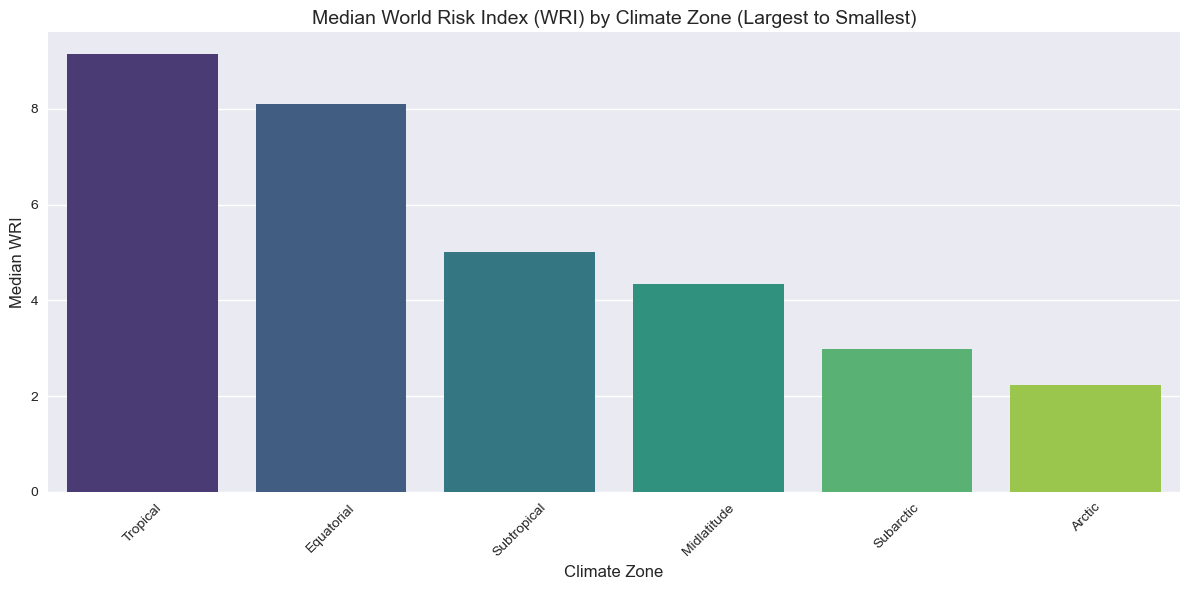

C:\Users\isava\AppData\Local\Temp\ipykernel_18020\1717609625.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='zone', y='Vulnerability', data=vulnerability_sorted, palette='plasma')


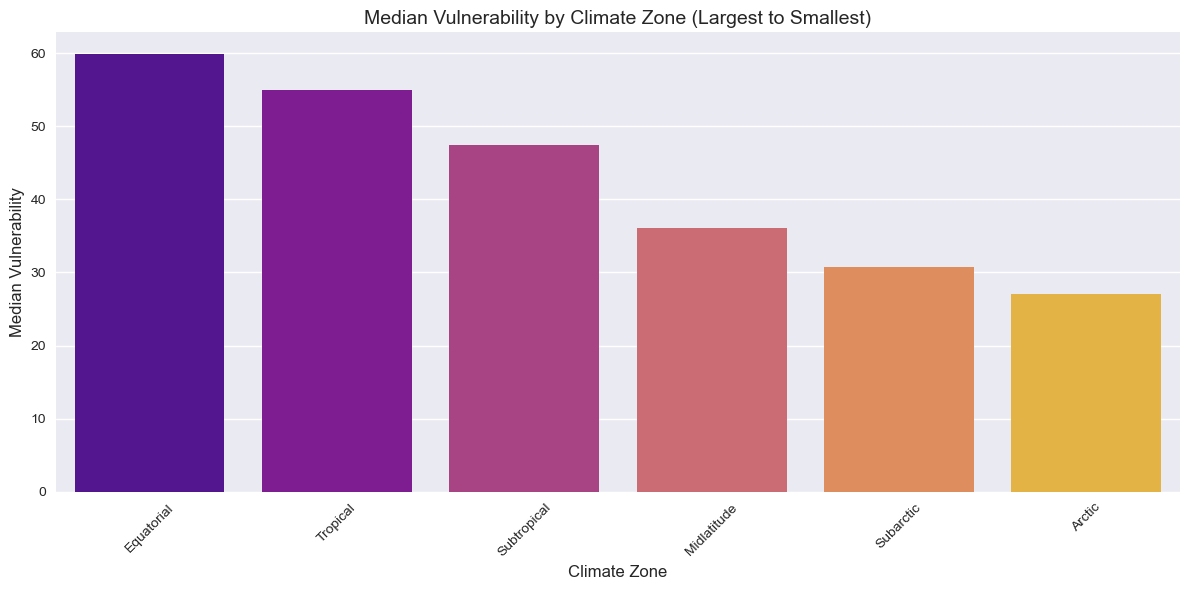

C:\Users\isava\AppData\Local\Temp\ipykernel_18020\1717609625.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='zone', y='Exposure', data=exposure_sorted, palette='cividis')


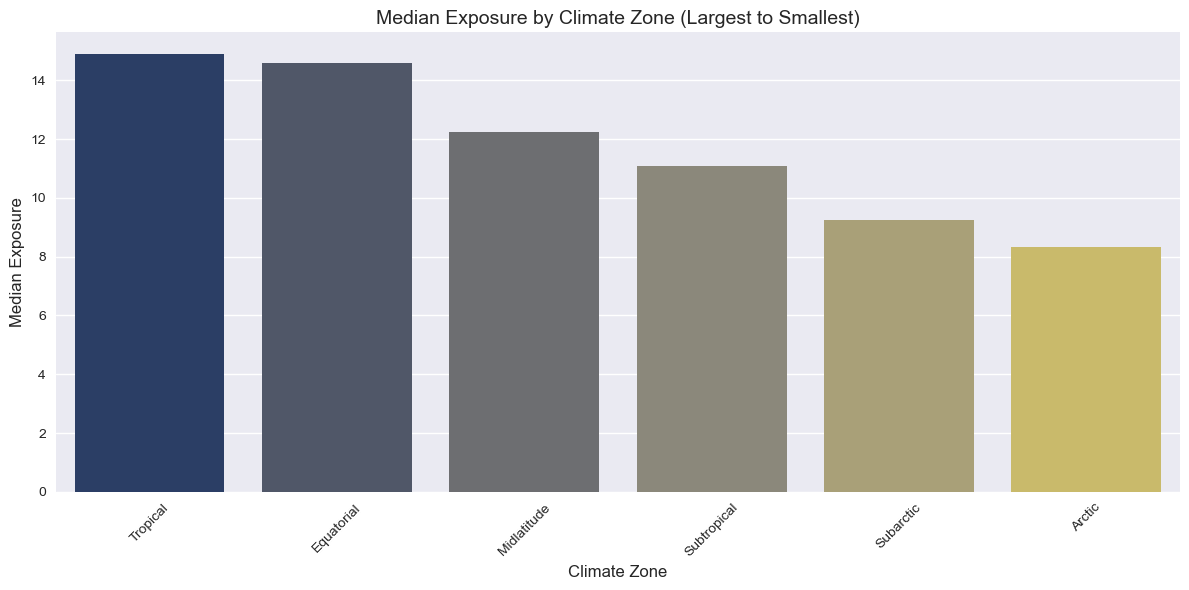

In [291]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract just the median columns for plotting
wri_median = zone_stats[('WRI', 'median')]
vulnerability_median = zone_stats[('Vulnerability', 'median')]
exposure_median = zone_stats[('Exposure', 'median')]

# Create a new dataframe with just the medians
medians_df = pd.DataFrame({
    'zone': wri_median.index,
    'WRI': wri_median.values,
    'Vulnerability': vulnerability_median.values,
    'Exposure': exposure_median.values
})

plt.style.use('seaborn-v0_8')
wri_sorted = medians_df.sort_values('WRI', ascending=False)
vulnerability_sorted = medians_df.sort_values('Vulnerability', ascending=False)
exposure_sorted = medians_df.sort_values('Exposure', ascending=False)

# median WRI values (sorted)
plt.figure(figsize=(12, 6))
sns.barplot(x='zone', y='WRI', data=wri_sorted, palette='viridis')
plt.title('Median World Risk Index (WRI) by Climate Zone (Largest to Smallest)', fontsize=14)
plt.xlabel('Climate Zone', fontsize=12)
plt.ylabel('Median WRI', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# median Vulnerability values (sorted)
plt.figure(figsize=(12, 6))
sns.barplot(x='zone', y='Vulnerability', data=vulnerability_sorted, palette='plasma')
plt.title('Median Vulnerability by Climate Zone (Largest to Smallest)', fontsize=14)
plt.xlabel('Climate Zone', fontsize=12)
plt.ylabel('Median Vulnerability', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# median Exposure values (sorted)
plt.figure(figsize=(12, 6))
sns.barplot(x='zone', y='Exposure', data=exposure_sorted, palette='cividis')
plt.title('Median Exposure by Climate Zone (Largest to Smallest)', fontsize=14)
plt.xlabel('Climate Zone', fontsize=12)
plt.ylabel('Median Exposure', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- The median WRI is highest in tropical regions with equatorial regions being the median second highest.
- The median vulnerability is highest in equatorial regions with tropical regions being the median second highest.
- The esxposure is highest in tropical regions with equatorial regions being the median second highest.
- The artic scores the lowest for all three variables.
- It appears that as land moves away from the equator the exposure scores reduce which is what I expected.


# 04 Write Data

In [300]:
df_lat.to_csv(os.path.join(path,'02 Data','CleanedData', 'world_risk_cleaned_lat.csv'), index = False)